# Some gun violence analysis with Wikipedia data

As [requested by John Stokes](https://twitter.com/jonst0kes/status/282330530412888064),
here are per-capita numbers for gun-related homicides,
relating to GDP and total homicides,
so the situation in the United States can be put in context relative to other nations.

main data source is UNODC (via Wikipedia [here](http://en.wikipedia.org/wiki/List_of_countries_by_intentional_homicide_rate)
and [here](http://en.wikipedia.org/wiki/List_of_countries_by_firearm-related_death_rate)).

GDP data from World Bank, again [via Wikipedia](http://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28PPP%29_per_capita).

If the numbers on Wikipedia are inaccurate, or their relationship is not sound
(e.g. numbers taken from different years, during which significant change occured)
then obviously None of this analysis is valid.

To summarize the data,
every possible way you look at it the US is lousy at preventing gun violence.
Even when compared to significantly more violent places,
gun violence in the US is a serious problem,
and when compared to similarly wealthy places,
the US is an outstanding disaster.

**UPDATE:** the relationship of the gun data and totals does not seem to be valid.
[FBI data](http://www2.fbi.gov/ucr/cius2009/offenses/violent_crime/index.html) suggests that
the relative contribution of guns to homicides in the US is 47%,
but relating these two data sources gives 80%.
Internal comparisons should still be fine, but 'fraction' analysis has been stricken.

In [95]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/zunbeltz/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['select']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [96]:
from IPython.display import display
import pandas
pandas.set_option('display.notebook_repr_html', True)
pandas.set_option('display.precision', 2)

Some utility functions for display

In [97]:
def plot_percent(df, limit=10):
    df['Gun Percent'][:limit].plot()
    plt.ylim(0,100)
    plt.title("% Gun Homicide")
    plt.show()


In [98]:
def plot_percapita(df, limit=10):
    df = df.loc[:,['Homicides', 'Gun Homicides']][:limit]
    df['Total Homicides'] = df['Homicides'] - df['Gun Homicides']
    del df['Homicides']
    df.plot(kind='bar', stacked=True, sort_columns=True)
    plt.ylabel("per 100k")
    plt.show()


In [99]:
def display_relevant(df, limit=10):
    display(df.loc[:,['Homicides', 'Gun Homicides', 'Gun Data Source']][:limit])

Load the data

In [100]:
totals = pandas.read_csv('totals.csv', '\t', index_col=0)
guns = pandas.read_csv('guns.csv', '\t', index_col=0)
gdp = pandas.read_csv('gdp.csv', '\t', index_col=1)
data = totals.join(guns).join(gdp)
data['Gun Percent'] = 100 * data['Gun Homicides'] / data['Homicides']
del data['Unintentional'],data['Undetermined'],data['Gun Suicides']
data = data.dropna()

Of all sampled countries (Found data for 68 countries),
the US is in the top 15 in Gun Homicides per capita.

Numbers are per 100k.

In [101]:
data = data.sort_values("Gun Homicides", ascending=False)
display_relevant(data, 15)

,Homicides,Gun Homicides,Gun Data Source
Country,,,
El Salvador,69.2,50.36,OAS 2011[1]
Jamaica,52.2,47.44,OAS 2011[1]
Honduras,91.6,46.70,OAS 2011[1]
Guatemala,38.5,38.50,OAS 2011[1]
Colombia,33.4,27.10,UNODC 2011 [2]
Brazil,21.0,18.10,UNODC 2011[3]
Panama,21.6,12.92,OAS 2011[1]
Mexico,16.9,10.00,UNODC 2011[4]
Paraguay,11.5,7.35,UNODC 2000[11]


Take top 30 Countries by GDP

In [102]:
top = data.sort_values('GDP')[-30:]

and rank them by Gun Homicides per capita:

,Homicides,Gun Homicides,Gun Data Source
Country,,,
United States,4.2,3.70,OAS 2012[5][6]
Israel,2.1,0.94,WHO 2012[10]
Canada,1.6,0.76,Krug 1998[13]
Luxembourg,2.5,0.60,WHO 2012[10]
Greece,1.5,0.59,Krug 1998[13]


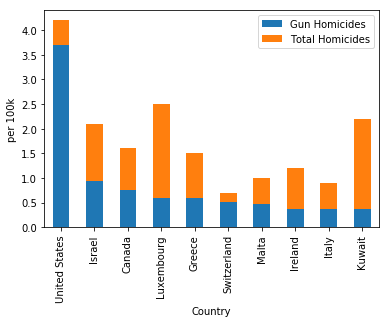

In [103]:
top_by_guns = top.sort_values("Gun Homicides", ascending=False)
display_relevant(top_by_guns, 5)
plot_percapita(top_by_guns, 10)

**NOTE:** these bar graphs should not be interpreted as fractions of a total,
as the two data sources do not appear to be comparable.
But the red and blue bar graphs should still be internally comparable.

The US is easily #1 of 30 wealthiest countries in Gun Homicides per capita,
by a factor of 4:1

Adding USA, Canada, and Mexico to all of Europe,
USA is a strong #2 behind Mexico in total gun homicides per-capita

By Total Gun Homicides


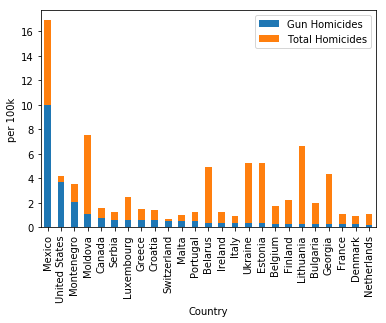

,Homicides,Gun Homicides,Gun Data Source
Country,,,
Mexico,16.9,10.00,UNODC 2011[4]
United States,4.2,3.70,OAS 2012[5][6]
Montenegro,3.5,2.06,WHO 2012[10]
Moldova,7.5,1.04,WHO 2012[10]
Canada,1.6,0.76,Krug 1998[13]
Serbia,1.2,0.62,WHO 2012[10]
Luxembourg,2.5,0.60,WHO 2012[10]
Greece,1.5,0.59,Krug 1998[13]
Croatia,1.4,0.57,WHO 2012[10]


In [104]:
index = (data['Region'] == 'Europe') | \
        (data.index == 'United States') | \
        (data.index == 'Canada') | \
        (data.index == 'Mexico')
selected = data[index]

print("By Total Gun Homicides")
sys.stdout.flush()

by_guns = selected.sort_values("Gun Homicides", ascending=False)
#by_guns['Gun Homicides'].plot(kind='bar')
plot_percapita(by_guns, limit=25)
display_relevant(selected, limit=None)


Let's just compare US, Canada, and UK:

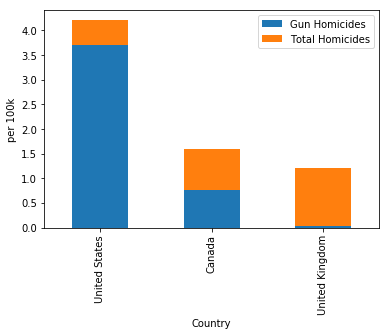

In [105]:
select = data.loc[['United States', 'Canada', 'United Kingdom']]
plot_percapita(select)

Normalize to the US numbers (inverse)

In [106]:
select['Homicides'] = select['Homicides']['United States'] / select['Homicides']
select['Gun Homicides'] = select['Gun Homicides']['United States'] / select['Gun Homicides']
display_relevant(select)

,Homicides,Gun Homicides,Gun Data Source
Country,,,
United States,1.00,1.00,OAS 2012[5][6]
Canada,2.62,4.87,Krug 1998[13]
United Kingdom,3.50,92.50,WHO2012 [10]


So, you are 2.6 times more likely to be killed in the US than Canada,
and 3.5 times more likely than in the UK.
That's bad, but not extreme.

However, you are 4.9 times more likely to be killed *with a gun* in the US than Canada,
and almost 100 times more likely than in the UK.  That is pretty extreme.


Countries represented:

In [107]:
for country in data.index:
    print(country)

El Salvador
Jamaica
Honduras
Guatemala
Colombia
Brazil
Panama
Mexico
Paraguay
Nicaragua
United States
Costa Rica
Uruguay
Barbados
Argentina
Montenegro
Peru
Moldova
Israel
India
Canada
Serbia
Luxembourg
Greece
Uzbekistan
Croatia
Kyrgyzstan
Switzerland
Malta
Portugal
Belarus
Ireland
Kuwait
Italy
Ukraine
Estonia
Belgium
Finland
Cyprus
Lithuania
Bulgaria
Georgia
France
Denmark
Netherlands
Sweden
Qatar
Slovakia
Austria
Latvia
New Zealand
Spain
Hungary
Hong Kong
Czech Republic
Australia
Singapore
Chile
Germany
Slovenia
Norway
Azerbaijan
United Kingdom
South Korea
Romania
Japan
Poland
Mauritius
